<a href="https://colab.research.google.com/github/mani3354488/djreact/blob/master/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def generate_dataset():
  #Generate 100 training data points for x varibale in the range of 0 and 2.
  #linspace- Return evenly spaced numbers over a specified interval.
  x_batch = np.linspace(0, 2, 100)
  
  #print("size",x_batch.shape)
  y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
  
  #Generate Test dataset
  x_test = np.linspace(0, 2, 100)
  y_test = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
  
  
  return x_batch, y_batch, x_test, y_test

In [0]:
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')
  
  
  #tf.placeholder - A placeholder is simply a variable that we will assign data to at a later date.
  #It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders.
  
  
  with tf.variable_scope('lreg') as scope:
    #A variable maintains state in the graph across calls to run()
    
    w = tf.Variable(np.random.normal(), name='W') #Random Initializer of variable
    b = tf.Variable(np.random.normal(), name='b')
    
		
    y_pred = tf.add(tf.multiply(w, x), b) #One neuron model : Transfer function - Linear
    #y_pred=tf.sigmoid(tf.add(tf.multiply(w, x), b)) # Transfer function sigmoid : Incorrect here.

    loss = tf.reduce_mean(tf.square(y_pred - y)) # Square Loss Error Function
  return x, y, y_pred, loss

Instructions for updating:
Colocations handled automatically by placer.
0 loss: 4.2490263
1 loss: 3.485078
2 loss: 2.8118632
3 loss: 2.2296524
4 loss: 1.737717
5 loss: 1.3340945
6 loss: 1.0153608
7 loss: 0.77642846
8 loss: 0.61040866
9 loss: 0.5086019
10 loss: 0.46067473
11 loss: 0.45506206
12 loss: 0.47959474
13 loss: 0.5222855
14 loss: 0.5721514
15 loss: 0.6199271
16 loss: 0.6585513
17 loss: 0.683369
18 loss: 0.69205976
19 loss: 0.6843586
20 loss: 0.6616446
21 loss: 0.62647766
22 loss: 0.58213943
23 loss: 0.5322161
24 loss: 0.48024258
25 loss: 0.4294213
26 loss: 0.382412
27 loss: 0.34119725
28 loss: 0.30701715
29 loss: 0.28036934
Predicting


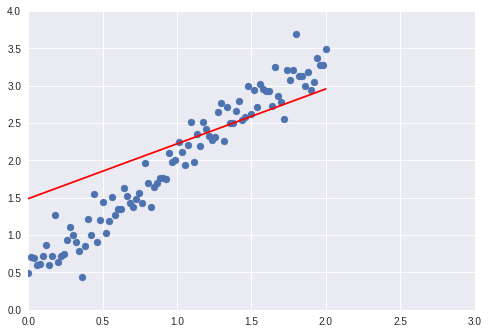

In [0]:
def run():
  x_batch, y_batch, x_test, y_test = generate_dataset()
  x, y, y_pred, loss = linear_regression()

  #optimizer = tf.train.GradientDescentOptimizer(0.01) # Learning rate 0.1
  optimizer = tf.train.AdamOptimizer(0.1) # AdamOptimiser
  train_op = optimizer.minimize(loss)
  
  
  #TensorFlow uses lazy evaluation. This really means that the graph is only computed when a session starts.
  #If no graph argument is specified when constructing the session, the default graph will be launched in the session. If you are using more than one graph (created with tf.Graph())
  
  
  #  target: (Optional.) The execution engine to connect to. Defaults to using an in-process engine. See Distributed TensorFlow for more examples.
  #  graph: (Optional.) The Graph to be launched (described above).
  #  config: (Optional.) A ConfigProto protocol buffer with configuration options for the session.

  
  
  #server = tf.train.Server.create_local_server()
  #sess = tf.Session(server.target)  # Create a session on the server. The session is created by default.
  
  with tf.Session() as session:
    #When you launch the graph, variables have to be explicitly initialized before you can run Ops that use their value.
    session.run(tf.global_variables_initializer())
    
    #feed_dict is a dictionary with its key being a tf.Tensor, tf.placeholder or tf.SparseTensor. 
    #The feed_dict argument allows the caller to override the value of the tensors (scalar, string, list, numpy array or tf.placeholder e.g. x and y) in the graph.
    
    #In this line, the x and y are the placeholders and x_batch and y_batch are the values generated, ready to fill up the placeholders during session.run().
    feed_dict = {x: x_batch, y: y_batch}
		
    #Number of epoch are 30
    for i in range(30):
      session.run(train_op, feed_dict)
      #t.eval() is a shortcut for calling tf.get_default_session().run(t).
      print(i, "loss:", loss.eval(feed_dict))

    print('Predicting')
    #y_pred_batch = session.run(y_pred, {x : x_batch})
    y_pred_batch = session.run(y_pred, {x : x_test})

  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 3)
  plt.ylim(0, 4)
  plt.savefig('plot.png')

if __name__ == "__main__":
  run()

In [0]:
x = tf.placeholder(tf.float32, shape=(1024, 1024))
y = tf.matmul(x, x)

with tf.Session() as sess:
  #print(sess.run(y))  # ERROR: will fail because x was not fed.

  rand_array = np.random.rand(1024, 1024)
  print(sess.run(y, feed_dict={x: rand_array}))  # Will succeed.


[[256.1418  253.99373 244.94263 ... 250.97919 245.7476  257.66296]
 [243.05498 245.94649 237.23654 ... 246.08298 235.52719 254.14294]
 [260.42596 258.94965 248.83081 ... 256.1682  240.70958 263.47577]
 ...
 [245.62602 247.22243 243.21303 ... 240.71175 237.5433  251.99707]
 [254.54294 251.37634 250.9795  ... 249.60007 239.59315 259.05066]
 [259.05637 251.7667  251.19044 ... 252.67545 243.19107 258.81638]]


**Client**

A client is typically a program that builds a TensorFlow graph and constructs a tensorflow::Session to interact with a cluster. Clients are typically written in Python or C++. A single client process can directly interact with multiple TensorFlow servers (see "Replicated training" above), and a single server can serve multiple clients.

**Cluster**

A TensorFlow cluster comprises one or more "jobs", each divided into lists of one or more "tasks". A cluster is typically dedicated to a particular high-level objective, such as training a neural network, using many machines in parallel. A cluster is defined by a tf.train.ClusterSpec object.

**Job**

A job comprises a list of "tasks", which typically serve a common purpose. For example, a job named ps (for "parameter server") typically hosts nodes that store and update variables; while a job named worker typically hosts stateless nodes that perform compute-intensive tasks. The tasks in a job typically run on different machines. The set of job roles is flexible: for example, a worker may maintain some state.

**Master service**

An RPC service that provides remote access to a set of distributed devices, and acts as a session target. The master service implements the tensorflow::Session interface, and is responsible for coordinating work across one or more "worker services". All TensorFlow servers implement the master service.

**Task**

A task corresponds to a specific TensorFlow server, and typically corresponds to a single process. A task belongs to a particular "job" and is identified by its index within that job's list of tasks.



**Local server: **
# Start a TensorFlow server as a single-process "cluster".



```
import tensorflow as tf
c = tf.constant("Hello, distributed TensorFlow!")
server = tf.train.Server.create_local_server()
sess = tf.Session(server.target)  # Create a session on the server.
sess.run(c)
```
# Start a Tensorflow server  on Cluster:





```

tf.train.ClusterSpec({
    "worker": [
        "worker0.example.com:2222",
        "worker1.example.com:2222",
        "worker2.example.com:2222"
    ],
    "ps": [
        "ps0.example.com:2222",
        "ps1.example.com:2222"
    ]})


```

